In [447]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [448]:
#================================
# Get max "countinuous 0" from 1-d array
#================================

def getMaxLength(arr, n):
 
    # initialize count
    count = 0
    result = 0
    prev_val = None
    cur_val = None
    
    # print("get max len : ", n)
 
    for i in range(30, n-30):
        prev_var = cur_val
        cur_val = arr[i]
        #print("col value (t-1) : ", i, prev_var)
        #print("col value (t) : ", i, cur_val)
        
        if ((cur_val==0) or (prev_val== 0)) :
            count+= 1
            result = max(result, count)
        elif ((cur_val==0) or (prev_val== 1)) :
            count+= 1
            result = max(result, count)
        elif ((cur_val==1) or (prev_val== 0)) :
            count = 0
        else :
            count = 0

        #print("count (t) : ", count)
        
         
    return result
 



#================================
# Get eye width and height from a CSV
#================================

def update_xy (df) :
    
    df['max_h'] = 0
    df['max_w'] = 0

    array_eye_csv_for_org = df.to_numpy()
    
    array_eye_csv_for_org = np.delete(array_eye_csv_for_org, 0, 1) ## column
    array_eye_csv_for_org = np.delete(array_eye_csv_for_org, 0, 0)## row
    
    array_eye_csv_for_trans = array_eye_csv_for_org.copy()
    array_eye_csv_for_trans = np.transpose(array_eye_csv_for_trans)
    
    num_rows = array_eye_csv_for_org.shape[0]
    num_cols = array_eye_csv_for_org.shape[1]
    
    #print("update_xy(R,C) : ", num_rows, num_cols)
    max_width = 0
    for i in range(30, (num_rows-30) ) :         
        #print("row",i)
        #print("Unique : ", np.unique(array_eye_csv_for_org[i]))
        max_len = getMaxLength(array_eye_csv_for_org[i], num_cols)
        #if (max_len > max_width) :  max_width =  max_len 
        max_width = max(max_len, max_width)
        # print("row : ", i)
        #print("max_width : ", max_width)

    max_height = 0
    for i in range(30, (num_cols-30)) : 
        #print("col : ",i)
        #print("Unique : ", np.unique(array_eye_csv_for_trans[i]))
        max_len = getMaxLength(array_eye_csv_for_trans[i], num_cols)
        if (max_len > max_height) :  max_height =  max_len 
        max_height = max(max_len, max_height)
        #print("max_height : ", max_height)

    return max_width, max_height
#================================



In [449]:
   
    
list_csv = [] 
list_png = [] 
list_csv_path = [] 
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220923_trimmed_ff_sn_32_eom\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220923_trimmed_ss_sn_24_eom\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220923_trimmed_ss_sn_38_eom\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220923_trimmed_tt_sn_35_eom\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220923_trimmed_tt_sn_36_eom\\")
#list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20221001_eom_result_table_T4_lane_swap_from_HSIF_30\\eom_images\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220928_eom_result_table_T4_lane_swap_from_HSIF_27\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220922_eom_data_index_수정\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220926_eom_result_table_T4\\")
list_csv_path.append("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20220926_T4_burstmode_VT_sweep_eom\\")



print(len(list_csv_path))

for path in list_csv_path:    
    list_csv += glob.glob(path + "*.csv")    
    print("Num of elements of list_csv : ", len(list_csv))
    list_png += glob.glob(path + "*.png")    
    print("Num of elements of list_png : ", len(list_png))

# df_list_csv = pd.DataFrame(list_csv)
# display(df_list_csv.head(5))
# print(df_list_csv.columns)

9
Num of elements of list_csv :  212
Num of elements of list_png :  212
Num of elements of list_csv :  288
Num of elements of list_png :  288
Num of elements of list_csv :  500
Num of elements of list_png :  500
Num of elements of list_csv :  712
Num of elements of list_png :  712
Num of elements of list_csv :  922
Num of elements of list_png :  922
Num of elements of list_csv :  1271
Num of elements of list_png :  1272
Num of elements of list_csv :  1467
Num of elements of list_png :  1468
Num of elements of list_csv :  1841
Num of elements of list_png :  1842
Num of elements of list_csv :  2609
Num of elements of list_png :  2610


In [450]:
#arr = !ls "C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\20221001_eom_result_table_T4_lane_swap_from_HSIF_30\\eom_images\\"
#len(arr)

In [451]:
#================================
# Main function
#================================
ideal_width = 100
ideal_heigh = 50
criterion_x = int(ideal_width *0.3)
criterion_y = int(ideal_heigh * 0.3)


eye_info = np.zeros((len(list_csv),10))
print("eye_info shpae : ", eye_info.shape)
    
for idx, fname in enumerate(list_csv) :
    #print(idx, " : ", fname)    
    df = pd.read_csv(fname, sep=',', header=None)    
    #print("columns : ", df.columns)
    eye_info[idx][0] = idx
    #eye_info[idx][1] = (df*255).to_numpy  # image 
    eye_info[idx][2], eye_info[idx][3] = update_xy(df)
    if(  (eye_info[idx][2] > criterion_x) and  (eye_info[idx][3] > criterion_y)   ) :
        eye_info[idx][4] = 1
    else : 
        eye_info[idx][4] = 0
    # print(eye_info[idx])
    

    

eye_info shpae :  (2609, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,54.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,48.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,56.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,60.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0


[ 0.  1.  4. 40. 60.] [6 1 1 1 1]


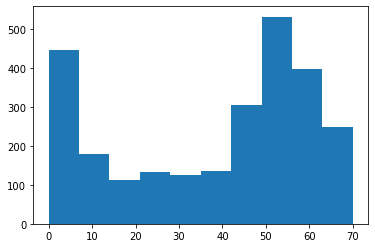

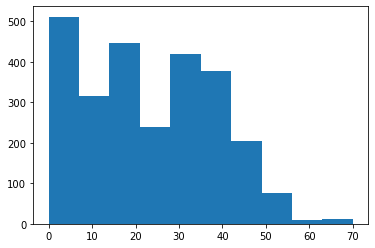

In [452]:
df_eye_info = pd.DataFrame(eye_info)
display(df_eye_info.head(5))


unique, unique_count = np.unique(eye_info[4], return_counts = True)
print(unique, unique_count)

plt.hist(df_eye_info.iloc[:,2])
plt.show()

plt.hist(df_eye_info.iloc[:,3])
plt.show()

In [453]:
print(eye_info.shape)
print(eye_info[:4,:])


print(list_csv[0])

(2609, 10)
[[ 0.  0. 54. 42.  1.  0.  0.  0.  0.  0.]
 [ 1.  0. 48. 37.  1.  0.  0.  0.  0.  0.]
 [ 2.  0. 56. 40.  1.  0.  0.  0.  0.  0.]
 [ 3.  0. 15. 16.  0.  0.  0.  0.  0.  0.]]
C:\Users\kimsc\Documents\SNU-ML\EOM\20220923_trimmed_ff_sn_32_eom\20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=1200_vcc=2500_EOM_HS5RateaLane1_dpattern=3_adapt=0x91_sync=0x4f_scramble=0_default_iter_idx=0_lane1.csv


In [454]:
print(list_name_split[0])
print(len(list_name_split[0]))

['20220923', 'run', 'Trimmed', 'FF', '#1', 'sn', '32', 'temp=90', 'vccq=1200', 'vcc=2500', 'EOM', 'HS5RateaLane1', 'dpattern=3', 'adapt=0x91', 'sync=0x4f', 'scramble=0', 'default', 'iter', 'idx=0', 'lane1']
20


In [455]:
# print( os.path.basename(list_csv[0])  )
# print( os.path.dirname(list_csv[0])  )
# print( os.path.splitext(list_csv[0])  )

df_eye_info = pd.DataFrame(eye_info[:,:5])
data_col_name = ["ID", "FILE_NAME", "MAX_W", "MAX_H", "Y", 
                 "DATE", "RUN", "TRIMMED", "CORNER", "F0", 
                 "SN", "F1", "TEMP", "VCCQ", "VCC", 
                 "EOM", "SPEED", "PATTERN", "ADAPT", "SYNC",
                 "SCRAMBLE"] #, "DEFAULT", "ITER", "IDX", "LANE"]

# 20220923', 'run', 'Trimmed', 'FF', '#1', 'sn', '32', 'temp=90', 'vccq=1200', 'vcc=2500', 'EOM', 'HS5RateaLane1', 'dpattern=3', '
# adapt=0x91', 'sync=0x4f', 'scramble=0', 'default', 'iter', 'idx=0', 'lane1']]


print(data_col_name)
display(df_eye_info.head(10))

list_name_split = [] #np.empty( [len(list_csv), 20], dtype=str )
#>>> np.empty([2, 2], dtype=int)


for idx, name in enumerate(list_csv) :
    fname, ftype = os.path.splitext(os.path.basename(list_csv[idx]))
    df_eye_info.iloc[idx, 1] = fname    
    #list_name_split.append( [idx, fname.split('_')] )
    list_name_split.append( fname.split('_') )
    
#     ist_feature_split = fname.split('_')    
#     print("Num of words : ", len(list_name_split), " --- :", list_name_split[idx])
#     if( len(fname.split('_')) != 20 ) :
#         print("Num of words : ", len(list_name_split), " --- :", list_name_split)
#         print()

df_list_name_split = pd.DataFrame(list_name_split)
display(df_list_name_split.head(10))
print(df_eye_info.info())
print(df_list_name_split.info())

df_eye_info = pd.concat([df_eye_info, df_list_name_split.iloc[:,0:16]], axis=1)

#df_eye_info.loc[:, data_col_name[5] ] = list_name_split
display(df_eye_info.head(10))


df_eye_info.columns = data_col_name
display(df_eye_info.head(10))

# Num of words :  1  --- : [0, ['20220923', 'run', 'Trimmed', 'FF', '#1', 'sn', '32', 'temp=90', 'vccq=1200', 'vcc=2500', 'EOM', 'HS5RateaLane1', 'dpattern=3', 'adapt=0x91', 'sync=0x4f', 'scramble=0', 'default', 'iter', 'idx=0', 'lane1']]


data_col_name = ["ID", "FILE_NAME", "MAX_W", "MAX_H", "Y", 
                 "DATE", "RUN", "TRIMMED", "CORNER", "F0", 
                 "SN", "F1", "TEMP", "VCCQ", "VCC", 
                 "EOM", "SPEED", "PATTERN", "ADAPT", "SYNC",
                 "SCRAMBLE"] #, "DEFAULT", "ITER", "IDX", "LANE"]



['ID', 'FILE_NAME', 'MAX_W', 'MAX_H', 'Y', 'DATE', 'RUN', 'TRIMMED', 'CORNER', 'F0', 'SN', 'F1', 'TEMP', 'VCCQ', 'VCC', 'EOM', 'SPEED', 'PATTERN', 'ADAPT', 'SYNC', 'SCRAMBLE']


,0,1,2,3,4
0,0.0,0.0,54.0,42.0,1.0
1,1.0,0.0,48.0,37.0,1.0
2,2.0,0.0,56.0,40.0,1.0
3,3.0,0.0,15.0,16.0,0.0
4,4.0,0.0,60.0,40.0,1.0
5,5.0,0.0,13.0,11.0,0.0
6,6.0,0.0,54.0,39.0,1.0
7,7.0,0.0,27.0,27.0,0.0
8,8.0,0.0,52.0,37.0,1.0
9,9.0,0.0,26.0,22.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,default,iter,idx=0,lane1,None,None
1,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,default,iter,idx=0,lane2,None,None
2,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,10,iter,idx=0,lane1
3,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,10,iter,idx=0,lane2
4,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,11,iter,idx=0,lane1
5,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,11,iter,idx=0,lane2
6,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,12,iter,idx=0,lane1
7,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,12,iter,idx=0,lane2
8,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,13,iter,idx=0,lane1
9,20220923,run,Trimmed,FF,#1,sn,32,temp=90,vccq=1200,vcc=2500,...,dpattern=3,adapt=0x91,sync=0x4f,scramble=0,reg,grp,13,iter,idx=0,lane2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2609 non-null   float64
 1   1       2609 non-null   object 
 2   2       2609 non-null   float64
 3   3       2609 non-null   float64
 4   4       2609 non-null   float64
dtypes: float64(4), object(1)
memory usage: 102.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2609 non-null   object
 1   1       2609 non-null   object
 2   2       2609 non-null   object
 3   3       2609 non-null   object
 4   4       2609 non-null   object
 5   5       2609 non-null   object
 6   6       2609 non-null   object
 7   7       2609 non-null   object
 8   8       2609 non-null   object
 9   9       2609 non-null   object
 10  10      2609 non-null   object
 

,0,1,2,3,4,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,0.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,54.0,42.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
1,1.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,48.0,37.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
2,2.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,56.0,40.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
3,3.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,15.0,16.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
4,4.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,60.0,40.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
5,5.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,13.0,11.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
6,6.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,54.0,39.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
7,7.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,27.0,27.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
8,8.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,52.0,37.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
9,9.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,26.0,22.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0


,ID,FILE_NAME,MAX_W,MAX_H,Y,DATE,RUN,TRIMMED,CORNER,F0,...,F1,TEMP,VCCQ,VCC,EOM,SPEED,PATTERN,ADAPT,SYNC,SCRAMBLE
0,0.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,54.0,42.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
1,1.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,48.0,37.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
2,2.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,56.0,40.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
3,3.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,15.0,16.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
4,4.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,60.0,40.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
5,5.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,13.0,11.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
6,6.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,54.0,39.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
7,7.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,27.0,27.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
8,8.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,52.0,37.0,1.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0
9,9.0,20220923_run_Trimmed_FF_#1_sn_32_temp=90_vccq=...,26.0,22.0,0.0,20220923,run,Trimmed,FF,#1,...,32,temp=90,vccq=1200,vcc=2500,EOM,HS5RateaLane1,dpattern=3,adapt=0x91,sync=0x4f,scramble=0


In [456]:
for i in range(0, len(data_col_name) ) :
    if(data_col_name[i] == "FILE_NAME") :
        pass
    else : 
        print("=================================================================")
        print("Check Unique", data_col_name[i])
        print("=================================================================")
        print(df_eye_info.iloc[:,i].unique())
        print("-----------------------------------------------------------------")
        print(df_eye_info.iloc[:,i].nunique())
        print("-----------------------------------------------------------------")
        print(df_eye_info.iloc[:,i].value_counts())
        print("-----------------------------------------------------------------")
        print("")
        print("")

Check Unique ID
[0.000e+00 1.000e+00 2.000e+00 ... 2.606e+03 2.607e+03 2.608e+03]
-----------------------------------------------------------------
2609
-----------------------------------------------------------------
0.0       1
1753.0    1
1735.0    1
1736.0    1
1737.0    1
         ..
871.0     1
872.0     1
873.0     1
874.0     1
2608.0    1
Name: ID, Length: 2609, dtype: int64
-----------------------------------------------------------------


Check Unique MAX_W
[54. 48. 56. 15. 60. 13. 27. 52. 26. 53. 57. 55. 59. 58. 50. 45.  7. 49.
 51.  4. 24.  3.  8.  9. 22.  5. 11. 37.  6. 30.  1.  2. 42. 47. 38. 33.
 14. 44. 46. 10. 29. 36. 40. 39. 34. 41. 43. 16. 17. 66. 21. 32. 28. 35.
 61. 63. 64. 62. 12. 31. 23. 67. 68. 70. 69. 19. 18. 25. 20. 65.  0.]
-----------------------------------------------------------------
71
-----------------------------------------------------------------
3.0     112
2.0     112
52.0     89
54.0     87
51.0     85
       ... 
69.0     11
38.0     11
20.0 

In [457]:
df_eye_info.to_csv("C:\\Users\\kimsc\\Documents\\SNU-ML\\EOM\\eye_info_1120.csv")


